In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
import time

import numpy as np
try:
    import mxnet as mx
except:
    sys.stderr.write("Cannot import mxnet.\n")
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.ndimage.interpolation import map_coordinates
from skimage.exposure import rescale_intensity
from skimage.transform import rotate

sys.path.append(os.environ['REPO_DIR'] + '/utilities')
from utilities2015 import *
from metadata import *
from data_manager import *
from learning_utilities import *
from distributed_utilities import *
from visualization_utilities import *

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
No vtk


Setting environment for Precision WorkStation


In [2]:
from sklearn.externals import joblib

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import GradientBoostingClassifier 

sys.path.append('/home/yuncong/csd395/xgboost/python-package')
try:
    from xgboost.sklearn import XGBClassifier
except:
    sys.stderr.write('xgboost is not loaded.')

xgboost is not loaded.

In [3]:
batch_size = 256
model_dir_name = 'inception-bn-blue'
model_name = 'inception-bn-blue'
model, mean_img = load_mxnet_model(model_dir_name=model_dir_name, model_name=model_name, 
                                   num_gpus=1, batch_size=batch_size)

/usr/local/lib/python2.7/dist-packages/mxnet/module/base_module.py:53: UserWarning: You created Module with Module(..., label_names=['softmax_label']) but input with name 'softmax_label' is not found in symbol.list_arguments(). Did you mean one of:
	data
  warnings.warn(msg)
/usr/local/lib/python2.7/dist-packages/mxnet/module/base_module.py:65: UserWarning: Data provided by label_shapes don't match names specified by label_names ([] vs. ['softmax_label'])
  warnings.warn(msg)


In [10]:
classes = ['pos', 'surPos', 'surNoclass']
num_samples_per_label = 1000
stacks = ['MD661']
win_id = 5

#############################################

structures_to_sample = ['SNR']

negative_labels_to_sample = [s + '_negative' for s in structures_to_sample]

margins_to_sample = [500]
surround_positive_labels_to_sample = [convert_to_surround_name(s, margin=m, suffix=surr_l) 
                             for m in margins_to_sample
                             for s in structures_to_sample 
                             for surr_l in all_known_structures
                             if surr_l != s]
surround_noclass_labels_to_sample = [convert_to_surround_name(s, margin=m, suffix='noclass') 
                             for m in margins_to_sample
                             for s in structures_to_sample]

labels_to_sample = []
if 'pos' in classes:
    labels_to_sample += structures_to_sample
if 'neg' in classes:
    labels_to_sample += negative_labels_to_sample
if 'surPos' in classes:
    labels_to_sample += surround_positive_labels_to_sample
if 'surNoclass' in classes:
    labels_to_sample += surround_noclass_labels_to_sample

###################################################

grid_indices_lookup_fps = {stack: DataManager.get_annotation_to_grid_indices_lookup_filepath(stack=stack, 
                                                                                             win_id=win_id,
                                                                         by_human=True, timestamp='latest')
                          for stack in stacks}    
addresses = generate_dataset_addresses(num_samples_per_label=num_samples_per_label, 
                                     stacks=stacks,
                                     labels_to_sample=labels_to_sample,
                                      grid_indices_lookup_fps=grid_indices_lookup_fps)

patches = apply_function_to_dict(lambda addrs: \
                                 extract_patches_given_locations_multiple_sections(addrs, location_or_grid_index='grid_index', 
                                                                                   version='gray',
                                                                                  win_id=win_id), 
               addresses)

#     variants = [0] # No rotation augmentation

#     addresses_vars = {}
#     for s, ps in patches.iteritems():
#         ps_vars = []
#         addrs_vars = []
#         for v in variants:
#             ps_var = rotate_all_patches_variant(ps, variant=v)
#             ps_vars.append(ps_var)
#             addrs_vars += addresses[s]
#         ps_vars = np.concatenate(ps_vars)

#         patch_images_fp = DataManager.get_dataset_patches_filepath(dataset_id=dataset_id, structure=s)      
# #         os.path.join(CLF_ROOTDIR, 'datasets', 'dataset_%d' % dataset_id, 'patch_images_%s.hdf' % s)
#         create_parent_dir_if_not_exists(patch_images_fp)
#         bp.pack_ndarray_file(ps_vars, patch_images_fp)
#         upload_to_s3(patch_images_fp, local_root=DATA_ROOTDIR)

#         # Save training addresses
#         addresses_fp = DataManager.get_dataset_addresses_filepath(dataset_id=dataset_id, structure=s)
#         save_pickle(addrs_vars, addresses_fp)
#         upload_to_s3(addresses_fp, DATA_ROOTDIR)

#     del ps_vars, addrs_vars, patches, addresses

aws s3 cp --recursive "s3://mousebrainatlas-data/CSHL_labelings_v3/MD661" "/home/yuncong/CSHL_labelings_v3/MD661" --exclude "*" --include "*contours*"
latest timestamp:  08022017175151


Read: 0.80 seconds
Sample addresses (stack MD661): 0. seconds.
Sample addresses: 0.82 seconds


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_gray/MD662&661-F116-2017.06.07-04.39.41_MD661_2_0347_prep2_lossless_gray.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_lossless_gray/MD662&661-F116-2017.06.07-04.39.41_MD661_2_0347_prep2_lossless_gray.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_gray/MD662&661-F116-2017.06.07-04.39.41_MD661_2_0347_prep2_lossless_gray.tif"


Load image: 6.16 seconds.


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_gray/MD662&661-F110-2017.06.07-02.03.05_MD661_1_0328_prep2_lossless_gray.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_lossless_gray/MD662&661-F110-2017.06.07-02.03.05_MD661_1_0328_prep2_lossless_gray.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_gray/MD662&661-F110-2017.06.07-02.03.05_MD661_1_0328_prep2_lossless_gray.tif"


Load image: 6.47 seconds.


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_gray/MD662&661-F55-2017.06.22-17.33.34_MD661_1_0163_prep2_lossless_gray.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_lossless_gray/MD662&661-F55-2017.06.22-17.33.34_MD661_1_0163_prep2_lossless_gray.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_gray/MD662&661-F55-2017.06.22-17.33.34_MD661_1_0163_prep2_lossless_gray.tif"


Load image: 6.78 seconds.


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_gray/MD662&661-F125-2017.06.07-16.50.51_MD661_2_0374_prep2_lossless_gray.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_lossless_gray/MD662&661-F125-2017.06.07-16.50.51_MD661_2_0374_prep2_lossless_gray.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_gray/MD662&661-F125-2017.06.07-16.50.51_MD661_2_0374_prep2_lossless_gray.tif"


Load image: 6.36 seconds.


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_gray/MD662&661-F114-2017.06.07-03.45.47_MD661_1_0340_prep2_lossless_gray.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_lossless_gray/MD662&661-F114-2017.06.07-03.45.47_MD661_1_0340_prep2_lossless_gray.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_gray/MD662&661-F114-2017.06.07-03.45.47_MD661_1_0340_prep2_lossless_gray.tif"


Load image: 6.12 seconds.


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_gray/MD662&661-F43-2017.06.05-21.05.21_MD661_1_0127_prep2_lossless_gray.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_lossless_gray/MD662&661-F43-2017.06.05-21.05.21_MD661_1_0127_prep2_lossless_gray.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_gray/MD662&661-F43-2017.06.05-21.05.21_MD661_1_0127_prep2_lossless_gray.tif"


Load image: 7.92 seconds.


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_gray/MD662&661-F45-2017.06.05-22.05.50_MD661_1_0133_prep2_lossless_gray.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_lossless_gray/MD662&661-F45-2017.06.05-22.05.50_MD661_1_0133_prep2_lossless_gray.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_gray/MD662&661-F45-2017.06.05-22.05.50_MD661_1_0133_prep2_lossless_gray.tif"


Load image: 8.63 seconds.


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_gray/MD662&661-F118-2017.06.07-11.26.45_MD661_2_0353_prep2_lossless_gray.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_lossless_gray/MD662&661-F118-2017.06.07-11.26.45_MD661_2_0353_prep2_lossless_gray.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_gray/MD662&661-F118-2017.06.07-11.26.45_MD661_2_0353_prep2_lossless_gray.tif"


Load image: 6.99 seconds.


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_gray/MD662&661-F47-2017.06.05-23.06.43_MD661_3_0141_prep2_lossless_gray.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_lossless_gray/MD662&661-F47-2017.06.05-23.06.43_MD661_3_0141_prep2_lossless_gray.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_gray/MD662&661-F47-2017.06.05-23.06.43_MD661_3_0141_prep2_lossless_gray.tif"


Load image: 6.46 seconds.


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_gray/MD662&661-F126-2017.06.07-17.13.02_MD661_1_0376_prep2_lossless_gray.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_lossless_gray/MD662&661-F126-2017.06.07-17.13.02_MD661_1_0376_prep2_lossless_gray.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_gray/MD662&661-F126-2017.06.07-17.13.02_MD661_1_0376_prep2_lossless_gray.tif"


Load image: 6.11 seconds.


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_gray/MD662&661-F121-2017.06.07-14.55.33_MD661_2_0362_prep2_lossless_gray.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_lossless_gray/MD662&661-F121-2017.06.07-14.55.33_MD661_2_0362_prep2_lossless_gray.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_gray/MD662&661-F121-2017.06.07-14.55.33_MD661_2_0362_prep2_lossless_gray.tif"


Load image: 9.82 seconds.


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_gray/MD662&661-F50-2017.06.06-00.35.44_MD661_1_0148_prep2_lossless_gray.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_lossless_gray/MD662&661-F50-2017.06.06-00.35.44_MD661_1_0148_prep2_lossless_gray.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_gray/MD662&661-F50-2017.06.06-00.35.44_MD661_1_0148_prep2_lossless_gray.tif"


Load image: 7.00 seconds.


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_gray/MD662&661-F57-2017.06.06-02.06.22_MD661_2_0170_prep2_lossless_gray.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_lossless_gray/MD662&661-F57-2017.06.06-02.06.22_MD661_2_0170_prep2_lossless_gray.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_gray/MD662&661-F57-2017.06.06-02.06.22_MD661_2_0170_prep2_lossless_gray.tif"


Load image: 6.48 seconds.


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_gray/MD662&661-F119-2017.06.07-11.50.55_MD661_2_0356_prep2_lossless_gray.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_lossless_gray/MD662&661-F119-2017.06.07-11.50.55_MD661_2_0356_prep2_lossless_gray.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_gray/MD662&661-F119-2017.06.07-11.50.55_MD661_2_0356_prep2_lossless_gray.tif"


Load image: 7.17 seconds.


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_gray/MD662&661-F52-2017.06.06-01.35.53_MD661_2_0155_prep2_lossless_gray.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_lossless_gray/MD662&661-F52-2017.06.06-01.35.53_MD661_2_0155_prep2_lossless_gray.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_gray/MD662&661-F52-2017.06.06-01.35.53_MD661_2_0155_prep2_lossless_gray.tif"


Load image: 7.47 seconds.


rm -rf "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_gray/MD662&661-F106-2017.06.07-00.20.03_MD661_2_0317_prep2_lossless_gray.tif" && mkdir -p "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_gray"
aws s3 cp "s3://mousebrainatlas-data/CSHL_data_processed/MD661/MD661_prep2_lossless_gray/MD662&661-F106-2017.06.07-00.20.03_MD661_2_0317_prep2_lossless_gray.tif" "/media/yuncong/BstemAtlasData/CSHL_data_processed/MD661/MD661_prep2_lossless_gray/MD662&661-F106-2017.06.07-00.20.03_MD661_2_0317_prep2_lossless_gray.tif"


Load image: 6.95 seconds.


In [16]:
windowing_properties = windowing_settings[win_id]
patch_size = windowing_properties['patch_size']
half_size = patch_size/2
spacing = windowing_properties['spacing']

sample_locations_allStacks = {}
for stack in stacks:
    w, h = metadata_cache['image_shape'][stack]
    sample_locations_allStacks[stack] = grid_parameters_to_sample_locations(grid_spec=(patch_size, spacing, w, h))

In [31]:
patch_locations = {label: [(st, sec, sample_locations_allStacks[st][grid_idx]) for st, sec, grid_idx in addrs] 
 for label, addrs in addresses.iteritems()}

In [44]:
training_patches = patches

In [45]:
features_allLabels = {}

for label in patches.iterkeys():

    print label, len(training_patches[label])

    # If using patch size different from 224x224, resize the patches before feeding to CNN.
    if windowing_settings[win_id]['patch_size'] == 448:
        training_patches[label] = [p[::2, ::2] for p in training_patches[label]]

    features = convert_image_patches_to_features(patches=training_patches[label], model=model, mean_img=mean_img, batch_size=batch_size)
    features_allLabels[label] = features
    
    ##################################################

#     # Save training features
#     features_fp = DataManager.get_dataset_features_filepath(dataset_id=feature_dataset_id, structure=label, ext='bp')
#     create_parent_dir_if_not_exists(features_fp)
#     bp.pack_ndarray_file(features, features_fp)
#     upload_to_s3(features_fp, local_root=DATA_ROOTDIR)

#     # Save training addresses
#     addresses_fp = DataManager.get_dataset_addresses_filepath(dataset_id=feature_dataset_id, structure=label)
#     save_pickle(training_addresses, addresses_fp)
#     upload_to_s3(addresses_fp, local_root=DATA_ROOTDIR)

SNR_surround_500_SNC 411
(411, 1, 224, 224)
SNR_surround_500_PBG 257
(257, 1, 224, 224)
SNR_surround_500_VLL 732
(732, 1, 224, 224)
SNR 1000
(1000, 1, 224, 224)
SNR_surround_500_noclass 1000
(1000, 1, 224, 224)
SNR_surround_500_Pn 6
(256, 1, 224, 224)


In [46]:
training_accuracies = {}

In [75]:
trained_classifiers = {}

In [97]:
margin_um = 500
feature_classifier_model = 'lr'
sample_weighting = None
neg_composition = 'neg_has_all_surround'
svm_id = None
num_samples_per_class = 500

for structure in ['SNR']:
#     for structure in all_known_structures:

    # Determine which labels to load.

    structures_to_sample = [structure]
    # structures_to_sample = all_known_structures
    # structures_to_sample = ['Pn']

    negative_labels_to_sample = [s + '_negative' for s in structures_to_sample]

    margins_to_sample = [margin_um]
    surround_positive_labels_to_sample = [convert_to_surround_name(s, margin=m, suffix=surr_l) 
                                 for m in margins_to_sample
                                 for s in structures_to_sample 
                                 for surr_l in all_known_structures
                                 if surr_l != s]
    surround_noclass_labels_to_sample = [convert_to_surround_name(s, margin=m, suffix='noclass') 
                                 for m in margins_to_sample
                                 for s in structures_to_sample]

    if neg_composition == 'neg_has_everything_else':
        labels_to_sample = structures_to_sample + negative_labels_to_sample
    elif neg_composition == 'neg_has_only_surround_noclass':
        labels_to_sample = structures_to_sample + surround_noclass_labels_to_sample + ['noclass']
    elif neg_composition == 'neg_has_all_surround':
        labels_to_sample = structures_to_sample + surround_positive_labels_to_sample + surround_noclass_labels_to_sample + ['noclass']
    elif neg_composition == 'neg_has_surround_and_negative':
        labels_to_sample = structures_to_sample + negative_labels_to_sample + surround_positive_labels_to_sample + surround_noclass_labels_to_sample
    else:
        raise Exception("neg_composition %s not recognized" % neg_composition)

    ######################

#     training_set_ids = map(int, str(classifier_properties['train_set_id']).split('/'))
#     training_features, training_addresses = DataManager.load_datasets_bp(training_set_ids, 
#                                                                          labels_to_sample=labels_to_sample)
    training_features = {}
    for l in labels_to_sample:
        if l in features_allLabels:
            training_features[l] = features_allLabels[l]

    ########################

    labels_found = training_features.keys()
    structures_found = set([convert_to_original_name(l) for l in labels_found 
                        if convert_to_original_name(l) in labels_found]) - {'noclass'}

    ######################

    print structure

    #############################
    ## Define Positive Samples ##
    #############################

    features_pos = training_features[structure]

    if num_samples_per_class is not None:
        
        features_pos_sample_indices = np.random.choice(range(len(features_pos)), 
                                                     replace=False, 
                                                     size=(min(num_samples_per_class, len(features_pos)),))
        features_pos_unused_indices = np.setdiff1d(range(len(features_pos)), features_pos_sample_indices)
        features_pos_unused = features_pos[features_pos_unused_indices]
        
        features_pos = features_pos[features_pos_sample_indices]

    n_pos = len(features_pos)
    print n_pos, 'positive examples'

    #############################
    ## Define Negative Samples ##
    #############################

    if neg_composition == 'neg_has_only_surround_noclass':
        neg_classes = [convert_to_surround_name(structure, margin=margin_um, suffix='noclass')]
    elif neg_composition == 'neg_has_all_surround':
        neg_classes = [convert_to_surround_name(structure, margin=margin_um, suffix='noclass')]
        for surr_s in all_known_structures:
            c = convert_to_surround_name(structure, margin=margin_um, suffix=surr_s)
            if c in labels_found:
                neg_classes.append(c)
    elif neg_composition == 'neg_has_everything_else':
        neg_classes = [structure + '_negative']
    elif neg_composition == 'neg_has_surround_and_negative':
        neg_classes = [convert_to_surround_name(structure, margin=margin_um, suffix='noclass')]
        for surr_s in all_known_structures:
            c = convert_to_surround_name(structure, margin=margin_um, suffix=surr_s)
            if c in labels_found:
                neg_classes.append(c)
        neg_classes += [structure + '_negative']
    else:
        raise Exception('neg_composition %s is not recognized.' % neg_composition)

    features_neg = np.concatenate([training_features[neg_class] for neg_class in neg_classes])

    if num_samples_per_class is not None:
        features_neg_sample_indices = np.random.choice(range(len(features_neg)), 
                                                       replace=False,
                                                       size=(min(num_samples_per_class, len(features_neg)),))
        
        features_neg_unused_indices = np.setdiff1d(range(len(features_neg)), features_neg_sample_indices)
        features_neg_unused = features_neg[features_neg_unused_indices]
        
        features_neg = features_neg[features_neg_sample_indices]
        

    n_neg = len(features_neg)
    print n_neg, 'negative examples'

    ###########################
    ## Define Sample Weights ##
    ###########################

    if sample_weighting == 'weighted':
        neg_distances = np.concatenate([distances_to_structures[neg_class][structure] for neg_class in neg_classes])

        sample_weights_neg = np.ones((n_neg,))
        sample_weights_neg[neg_distances > thresh] = diminishing(neg_distances[neg_distances > thresh])
        sample_weights = np.r_[np.ones((n_pos,)), sample_weights_neg]
    else:
        sample_weights = None

    ###########################################################################################

    train_data = np.r_[features_pos, features_neg]
    train_labels = np.r_[np.ones((features_pos.shape[0], )), 
                         -np.ones((features_neg.shape[0], ))]

    #     n_train = len(train_labels0)
    #     ri = np.random.choice(range(n_train), size=100, replace=False)
    #     train_data = train_data0[ri]
    #     train_labels = train_labels0[ri]

    #####################################
    ## Define feature_classifier_model ##
    #####################################

    if feature_classifier_model == 'lr':
        clf = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, 
                                 fit_intercept=True, intercept_scaling=1, class_weight=None, 
                                 random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', 
                                 verbose=0, warm_start=False, n_jobs=1)

    elif feature_classifier_model == 'lin_svc':
        clf = SVC(C=1.0, kernel='linear', degree=3, gamma='auto', coef0=0.0, shrinking=True, 
                  probability=True, tol=0.001, cache_size=1000, max_iter=-1,
              decision_function_shape=None, random_state=None)


    elif feature_classifier_model == 'lin_svc_calib':

        sv_uncalibrated = LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, 
                                C=1.0, multi_class='ovr', 
                                fit_intercept=True, intercept_scaling=1, max_iter=100)
        clf = CalibratedClassifierCV(sv_uncalibrated)


    elif feature_classifier_model == 'xgb1':
        clf = XGBClassifier(max_depth=3, learning_rate=0.2, n_estimators=200, 
                            silent=False, objective='binary:logistic', nthread=-1, gamma=0, 
                            min_child_weight=20, max_delta_step=0, subsample=.8, 
                            colsample_bytree=.8, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
                            scale_pos_weight=1, base_score=0.5, seed=0, missing=None)

    elif feature_classifier_model == 'xgb2':
        clf = XGBClassifier(max_depth=5, learning_rate=0.2, n_estimators=100, 
                            silent=False, objective='binary:logistic')
        # 40s, 10,000 pos and 10,000 neg samples

    elif feature_classifier_model == 'gb1':
        clf = GradientBoostingClassifier(loss='deviance', learning_rate=0.3, n_estimators=200, 
                                         subsample=1., criterion='friedman_mse', 
                                         min_samples_split=50, min_samples_leaf=20, 
                                         min_weight_fraction_leaf=0.0, max_depth=3, 
                                         min_impurity_split=1e-07, init=None, random_state=None, 
                                         max_features=None, verbose=1, max_leaf_nodes=None, 
                                         warm_start=False, presort='auto')

    elif feature_classifier_model == 'gb2':
        clf = GradientBoostingClassifier(loss='deviance', learning_rate=0.3, n_estimators=100, 
                                         subsample=1., criterion='friedman_mse', 
                                         min_samples_split=50, min_samples_leaf=20, 
                                         min_weight_fraction_leaf=0.0, max_depth=5, 
                                         min_impurity_split=1e-07, init=None, random_state=None, 
                                         max_features=None, verbose=1, max_leaf_nodes=None, 
                                         warm_start=False, presort='auto')


    else:
        sys.stderr.write('Setting is not recognized.\n')

    t = time.time()    
    clf.fit(train_data, train_labels, sample_weight=sample_weights)
    sys.stderr.write('Fitting classifier: %.2f seconds\n' % (time.time() - t))

    trained_classifiers[structure] = clf
    
#         clf_fp = DataManager.get_classifier_filepath(classifier_id=svm_id, structure=structure)
#         create_parent_dir_if_not_exists(clf_fp)
#         joblib.dump(clf, clf_fp)
#         upload_to_s3(clf_fp)

    from sklearn.metrics import accuracy_score
    train_acc = accuracy_score(train_labels, clf.predict(train_data), normalize=True)
    print train_acc

    training_accuracies[structure] = train_acc

SNR
500 positive examples
500 negative examples
0.952


Fitting classifier: 0.24 seconds


In [98]:
negative_composition_rules = ['surround500']

In [104]:
fixed_n_pos = 500
fixed_n_neg = 500

In [105]:
acc_all_clfs_all_structures_all_negcomprule = defaultdict(lambda: defaultdict(dict))
tp_normalized_all_clfs_all_structures_all_negcomprule = defaultdict(lambda: defaultdict(dict))
# fn_normalized_all_clfs_all_structures_all_negcomprule = defaultdict(lambda: defaultdict(dict))
fp_normalized_all_clfs_all_structures_all_negcomprule = defaultdict(lambda: defaultdict(dict))
# tn_normalized_all_clfs_all_structures_all_negcomprule = defaultdict(lambda: defaultdict(dict))
precision_normalized_all_clfs_all_structures_all_negcomprule = defaultdict(lambda: defaultdict(dict))
recall_normalized_all_clfs_all_structures_all_negcomprule = defaultdict(lambda: defaultdict(dict))
f1score_normalized_all_clfs_all_structures_all_negcomprule =  defaultdict(lambda: defaultdict(dict))

classifier_ids = [0]

for classifier_id in classifier_ids:
    
    clf_allClasses = trained_classifiers

    ####################################################
    # Compute accuracy against each structure surround #
    ####################################################
    
    for neg_composition_rule in negative_composition_rules:
            
        ncols = 5
        nrows = int(np.ceil(len(structures_found)/float(ncols)))

    #     fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*2, nrows*2), sharex=True, sharey=True)
    #     axes = axes.flatten()

        for i, structure in enumerate(structures_found):

#             features_pos = test_features[structure]
            features_pos = features_pos_unused
    
            if fixed_n_pos is not None:
                features_pos = features_pos[np.random.choice(range( len(features_pos)), replace=False, size=(min(fixed_n_pos, len(features_pos)),))]

            n_pos = len(features_pos)
            print structure, n_pos, 'positive'

            if neg_composition_rule.startswith('surround'):
                if neg_composition_rule == 'surround200':
                    margin_um = 200
                elif neg_composition_rule == 'surround500':
                    margin_um = 500
                elif neg_composition_rule == 'surround1000':
                    margin_um = 1000
                else:
                    margin_um = None
                neg_classes = [convert_to_surround_name(structure, margin=margin_um, suffix='noclass')] + \
                [convert_to_surround_name(structure, margin=margin_um, suffix=surr_l) for surr_l in structures_found]
            elif neg_composition_rule == 'negative':
                neg_classes = [structure + '_negative']
            else:
                raise
            
            neg_classes = list(set(neg_classes) & set(labels_found))

#             features_neg = np.vstack([test_features[neg_class] for neg_class in neg_classes])
            features_neg = features_neg_unused
    
            if fixed_n_neg is not None:
                features_neg = features_neg[np.random.choice(range( len(features_neg)), replace=False, size=(min(fixed_n_neg, len(features_neg)),))]        

            n_neg = len(features_neg)
            print structure, n_neg, 'negative'

            test_data = np.r_[features_pos, features_neg]
            test_labels = np.r_[np.ones((features_pos.shape[0], )), 
                                 -np.ones((features_neg.shape[0], ))]

            if structure not in clf_allClasses:
                sys.stderr.write('Classifier for structure %s does not exist.\n' %  structure)
                continue

            clf = clf_allClasses[structure]

            probs = clf.predict_proba(test_data)[:, clf.classes_.tolist().index(1.)]
            
            
            ######### SOFT ########
#             cm = compute_confusion_matrix(np.c_[probs, 1-probs], [0 if l==1. else 1 for l in test_labels], soft=True,
#                                              normalize=False)
#             tp = cm[0,0]
#             fn = cm[0,1]
#             fp = cm[1,0]
#             tn = cm[1,1]

#             acc = (tp + tn) / (n_pos + n_neg)
#             acc_all_clfs_all_structures_all_negcomprule[classifier_id][structure][neg_composition_rule] = acc

            ######## PRECISION-RECALL ########
            precision_allthresh = {}
            recall_allthresh = {}
            f1score_allthresh = {}
            tp_normalized_allthresh = {}
            fp_normalized_allthresh = {}
            for th in np.arange(0., 1., 0.01):
            
                cm = compute_confusion_matrix(np.c_[probs, 1-probs], [0 if l==1. else 1 for l in test_labels], soft=False,
                                             normalize=False, binary=True, decision_thresh=th)

                tp = cm[0,0]
                fn = cm[0,1]
                fp = cm[1,0]
                tn = cm[1,1]
                
                tp_normalized = tp / n_pos
#                 fn_normalized = fn / n_pos
                fp_normalized = fp / n_neg
#                 tn_normalized = tn / n_neg

                precision = float(tp) / (tp + fp)
                recall = float(tp) / (tp + fn)
                f1score = 2*recall*precision/(recall+precision)
                
                tp_normalized_allthresh[float(th)] = tp_normalized
                fp_normalized_allthresh[float(th)] = fp_normalized
                precision_allthresh[float(th)] = precision
                recall_allthresh[float(th)] = recall
                f1score_allthresh[float(th)] = f1score

            tp_normalized_all_clfs_all_structures_all_negcomprule[classifier_id][structure][neg_composition_rule] = tp_normalized_allthresh
#             fn_normalized_all_clfs_all_structures_all_negcomprule[classifier_id][structure][neg_composition_rule] = fn_normalized_allthresh
            fp_normalized_all_clfs_all_structures_all_negcomprule[classifier_id][structure][neg_composition_rule] = fp_normalized_allthresh
#             tn_normalized_all_clfs_all_structures_all_negcomprule[classifier_id][structure][neg_composition_rule] = tn_normalized_allthresh
            precision_normalized_all_clfs_all_structures_all_negcomprule[classifier_id][structure][neg_composition_rule] = precision_allthresh
            recall_normalized_all_clfs_all_structures_all_negcomprule[classifier_id][structure][neg_composition_rule] = recall_allthresh
            f1score_normalized_all_clfs_all_structures_all_negcomprule[classifier_id][structure][neg_composition_rule] = f1score_allthresh
    #     plt.tight_layout()

        ############################

#         xticks = range(1, 1 + len(structures_sorted_by_size))

#         plt.figure(figsize=(10, 1.2));
#         plt.stem(xticks, [acc_all_clfs_all_structures[classifier_id][s] for s in structures_sorted_by_size]);
#         plt.xticks(xticks, structures_sorted_by_size, rotation='60');
#         plt.ylim([0.6, 1]);
#         plt.ylabel('Accuracy');
#         plt.xlabel('Structure Name');
#         plt.title('Accuracy, %s, classifier %d' % (neg_composition_rule, classifier_id));
#         plt.show();

#         print 'test accuracy:', np.mean(acc_all_clfs_all_structures[classifier_id].values())

#         plt.figure(figsize=(10, 1.2));
#         plt.stem(xticks, [tp_normalized_all_clfs_all_structures[classifier_id][s] for s in structures_sorted_by_size], label='tp', markerfmt='bo');
#         plt.stem(xticks, [fn_normalized_all_clfs_all_structures[classifier_id][s] for s in structures_sorted_by_size], label='fn', markerfmt='ro');
#         plt.stem(xticks, [fp_normalized_all_clfs_all_structures[classifier_id][s] for s in structures_sorted_by_size], label='fp', markerfmt='ko');
#         plt.stem(xticks, [tn_normalized_all_clfs_all_structures[classifier_id][s] for s in structures_sorted_by_size], label='tn', markerfmt='go');
#         plt.xticks(xticks, structures_sorted_by_size, rotation='60');
#         plt.ylabel('Percentage');
#         plt.xlabel('Structure Name');
#         plt.title('Accuracy, %s, classifier %d' % (neg_composition_rule, classifier_id));
#         plt.legend();
#         plt.show();

tp_normalized_all_clfs_all_structures_all_negcomprule.default_factory = None
# fn_normalized_all_clfs_all_structures_all_negcomprule.default_factory = None
fp_normalized_all_clfs_all_structures_all_negcomprule.default_factory = None
# tn_normalized_all_clfs_all_structures_all_negcomprule.default_factory = None
precision_normalized_all_clfs_all_structures_all_negcomprule.default_factory = None
recall_normalized_all_clfs_all_structures_all_negcomprule.default_factory = None
f1score_normalized_all_clfs_all_structures_all_negcomprule.default_factory = None

SNR 500 positive
SNR 500 negative


In [106]:
structures_sorted_by_size = ['SNR']

In [107]:
fopt_normalized_all_clfs_all_structures_all_negcomprule = defaultdict(lambda: defaultdict(dict))
optthresh_normalized_all_clfs_all_structures_all_negcomprule = defaultdict(lambda: defaultdict(dict))

for classifier_id in classifier_ids:

    for neg_composition_rule in negative_composition_rules:

        for s in structures_sorted_by_size:
            fp_allthresh = fp_normalized_all_clfs_all_structures_all_negcomprule[classifier_id][s][neg_composition_rule]
            tp_allthresh = tp_normalized_all_clfs_all_structures_all_negcomprule[classifier_id][s][neg_composition_rule]
            f_allthresh = f1score_normalized_all_clfs_all_structures_all_negcomprule[classifier_id][s][neg_composition_rule]

            optimal_th = np.arange(0, 1, 0.01)[np.nanargmax([f_allthresh[th] for th in np.arange(0, 1, 0.01)])]
            optthresh_normalized_all_clfs_all_structures_all_negcomprule[classifier_id][s][neg_composition_rule] = optimal_th
            fopt_normalized_all_clfs_all_structures_all_negcomprule[classifier_id][s][neg_composition_rule] = f_allthresh[optimal_th]

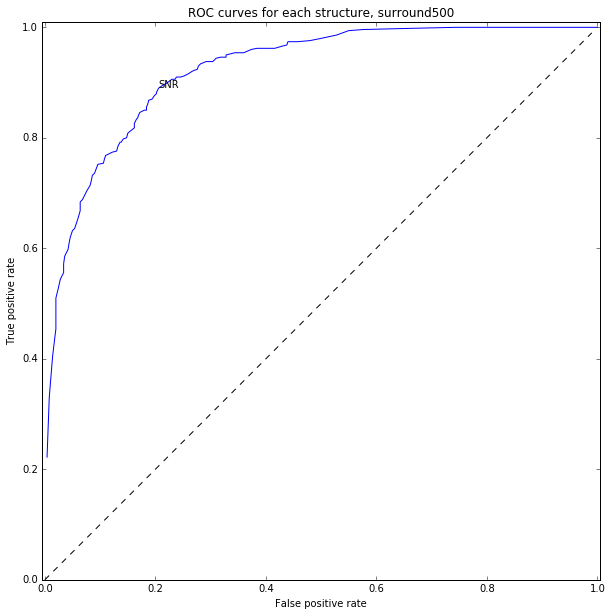

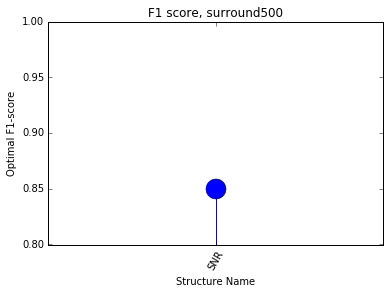

In [108]:
for classifier_id in classifier_ids:
    for neg_composition_rule in negative_composition_rules:

    #     plt.figure(figsize=(15, 10));
        plt.figure(figsize=(10, 10));
        plt.plot(np.arange(0, 1, 0.01), np.arange(0, 1, 0.01), c='k', linestyle='--');

        fopt = {}
        for s in structures_sorted_by_size:
            fp_allthresh = fp_normalized_all_clfs_all_structures_all_negcomprule[classifier_id][s][neg_composition_rule]
            tp_allthresh = tp_normalized_all_clfs_all_structures_all_negcomprule[classifier_id][s][neg_composition_rule]
            f_allthresh = f1score_normalized_all_clfs_all_structures_all_negcomprule[classifier_id][s][neg_composition_rule]

            plt.plot([fp_allthresh[float(th)] for th in np.arange(0, 1, 0.01)],
                 [tp_allthresh[float(th)] for th in np.arange(0, 1, 0.01)]);

            optimal_th = optthresh_normalized_all_clfs_all_structures_all_negcomprule[classifier_id][s][neg_composition_rule]
            fopt = f_allthresh[optimal_th]

    #         plt.scatter(fp_allthresh[optimal_th], tp_allthresh[optimal_th], 
    #             marker='o', facecolors='none', edgecolors='k')
    #         plt.text(fp_allthresh[optimal_th], tp_allthresh[optimal_th], '%.2f' % (fopt[s]))
            plt.text(fp_allthresh[optimal_th], tp_allthresh[optimal_th], s, fontsize=10)

    #     plt.legend();
        plt.ylabel('True positive rate');
        plt.xlabel('False positive rate');
    #     plt.xticks(np.arange(0,1,.1));
        plt.axis('equal');
        plt.ylim([0,1.01]);
        plt.xlim([0,1]);
        plt.title('ROC curves for each structure, %s' % (neg_composition_rule));
        plt.show();

    #     plt.figure();
    #     plt.hist(fopt.values(), bins=np.arange(0.7, 1.0, 0.01));
    #     plt.ylabel("Number of structures");
    #     plt.xlabel("Optimal f1 score");
    #     plt.show();

        plt.figure();
        xticks = range(1, 1 + len(structures_sorted_by_size))
        (markerLines, stemLines, baseLines) = plt.stem(xticks, 
                                                       [fopt_normalized_all_clfs_all_structures_all_negcomprule[classifier_id][s][neg_composition_rule] 
                                                        for s in structures_sorted_by_size],
         markerfmt='o', markevery=[4,8]);
        plt.setp(markerLines, markersize=20, alpha=1.)
        plt.xticks(xticks, structures_sorted_by_size, rotation='60');
        plt.ylabel('Optimal F1-score');
        plt.xlabel('Structure Name');
        plt.ylim(np.min([fopt_normalized_all_clfs_all_structures_all_negcomprule[classifier_id][s][neg_composition_rule] 
                                                        for s in structures_sorted_by_size])-.05, 1);
        plt.title('F1 score, %s' % (neg_composition_rule));
        plt.legend();
        plt.show();